In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import keras
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [48]:
salary_train = pd.read_csv('SalaryData_Train(1).csv')
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [49]:
salary = salary_train.drop_duplicates()
salary
import warnings
warnings.filterwarnings('ignore')

In [50]:
salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary['workclass']= label_encoder.fit_transform(salary['workclass'])
salary['education']= label_encoder.fit_transform(salary['education'])
salary['maritalstatus']= label_encoder.fit_transform(salary['maritalstatus'])
salary['occupation']= label_encoder.fit_transform(salary['occupation'])
salary['relationship']= label_encoder.fit_transform(salary['relationship'])
salary['race']= label_encoder.fit_transform(salary['race'])
salary['sex']= label_encoder.fit_transform(salary['sex'])
salary['native']= label_encoder.fit_transform(salary['native'])
salary['Salary']= label_encoder.fit_transform(salary['Salary'])

In [52]:
salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [53]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            26903 non-null  int64
 1   workclass      26903 non-null  int64
 2   education      26903 non-null  int64
 3   educationno    26903 non-null  int64
 4   maritalstatus  26903 non-null  int64
 5   occupation     26903 non-null  int64
 6   relationship   26903 non-null  int64
 7   race           26903 non-null  int64
 8   sex            26903 non-null  int64
 9   capitalgain    26903 non-null  int64
 10  capitalloss    26903 non-null  int64
 11  hoursperweek   26903 non-null  int64
 12  native         26903 non-null  int64
 13  Salary         26903 non-null  int64
dtypes: int64(14)
memory usage: 3.1 MB


In [54]:
salary.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [55]:
#sns.pairplot(salary, hue='Salary')

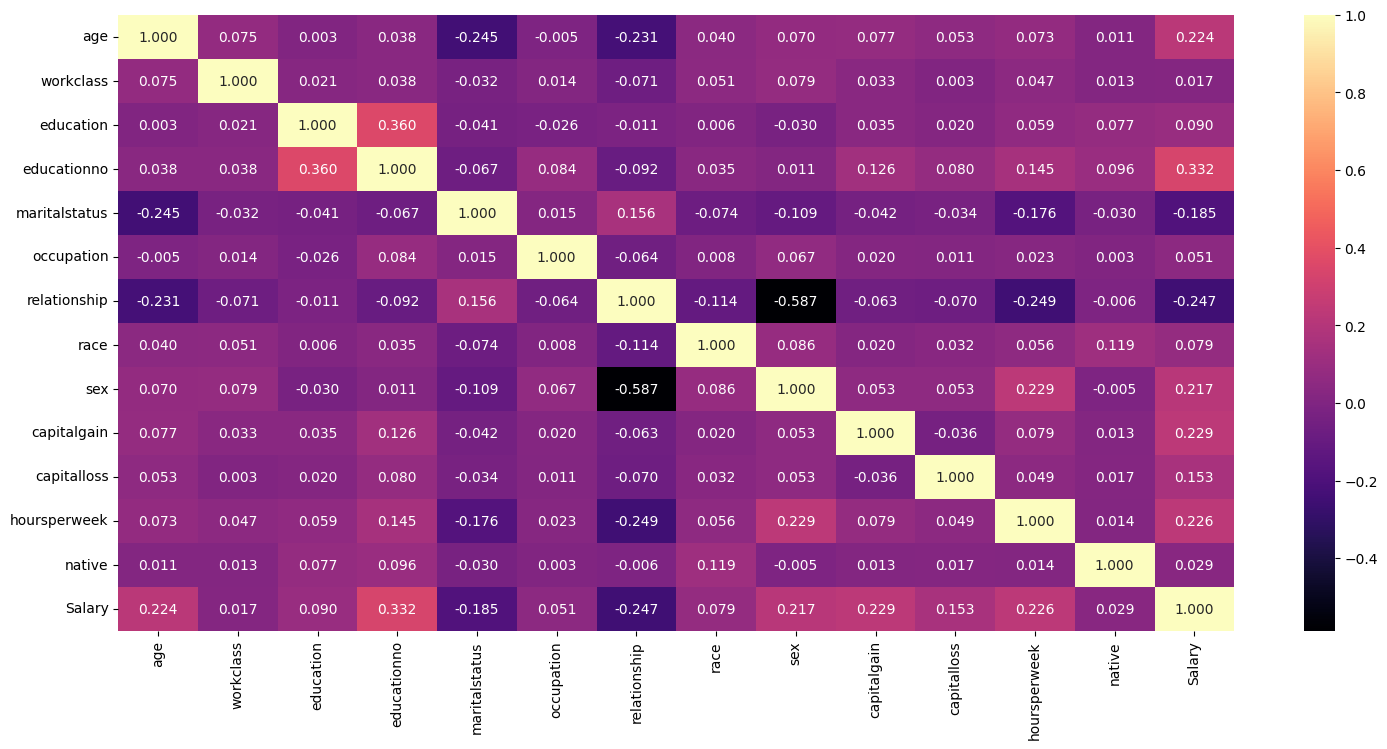

In [56]:
plt.figure(figsize = (18, 8));
sns.heatmap(salary.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

<Axes: xlabel='hoursperweek', ylabel='Density'>

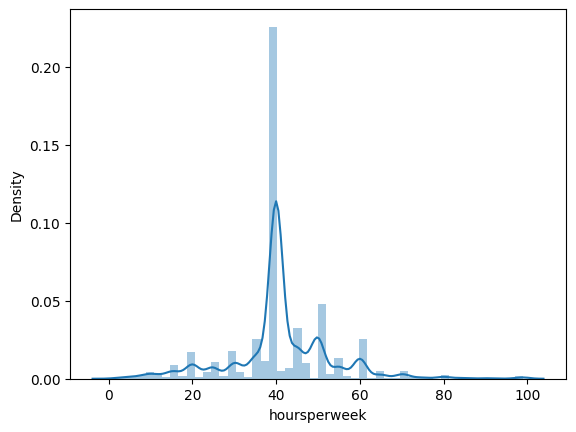

In [57]:
sns.distplot(salary['hoursperweek'])

In [58]:
salary_t = pd.read_csv('SalaryData_Test(1).csv')
salary_t

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [59]:
salary_test = salary_t.drop_duplicates()
salary_test
import warnings
warnings.filterwarnings('ignore')

In [60]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
salary_test['workclass']= label_encoder.fit_transform(salary_test['workclass'])
salary_test['education']= label_encoder.fit_transform(salary_test['education'])
salary_test['maritalstatus']= label_encoder.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']= label_encoder.fit_transform(salary_test['occupation'])
salary_test['relationship']= label_encoder.fit_transform(salary_test['relationship'])
salary_test['race']= label_encoder.fit_transform(salary_test['race'])
salary_test['sex']= label_encoder.fit_transform(salary_test['sex'])
salary_test['native']= label_encoder.fit_transform(salary_test['native'])
salary_test['Salary']= label_encoder.fit_transform(salary_test['Salary'])

In [61]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [62]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            14130 non-null  int64
 1   workclass      14130 non-null  int64
 2   education      14130 non-null  int64
 3   educationno    14130 non-null  int64
 4   maritalstatus  14130 non-null  int64
 5   occupation     14130 non-null  int64
 6   relationship   14130 non-null  int64
 7   race           14130 non-null  int64
 8   sex            14130 non-null  int64
 9   capitalgain    14130 non-null  int64
 10  capitalloss    14130 non-null  int64
 11  hoursperweek   14130 non-null  int64
 12  native         14130 non-null  int64
 13  Salary         14130 non-null  int64
dtypes: int64(14)
memory usage: 1.6 MB


In [63]:
salary_test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [64]:
#sns.pairplot(salary_test, hue='Salary')

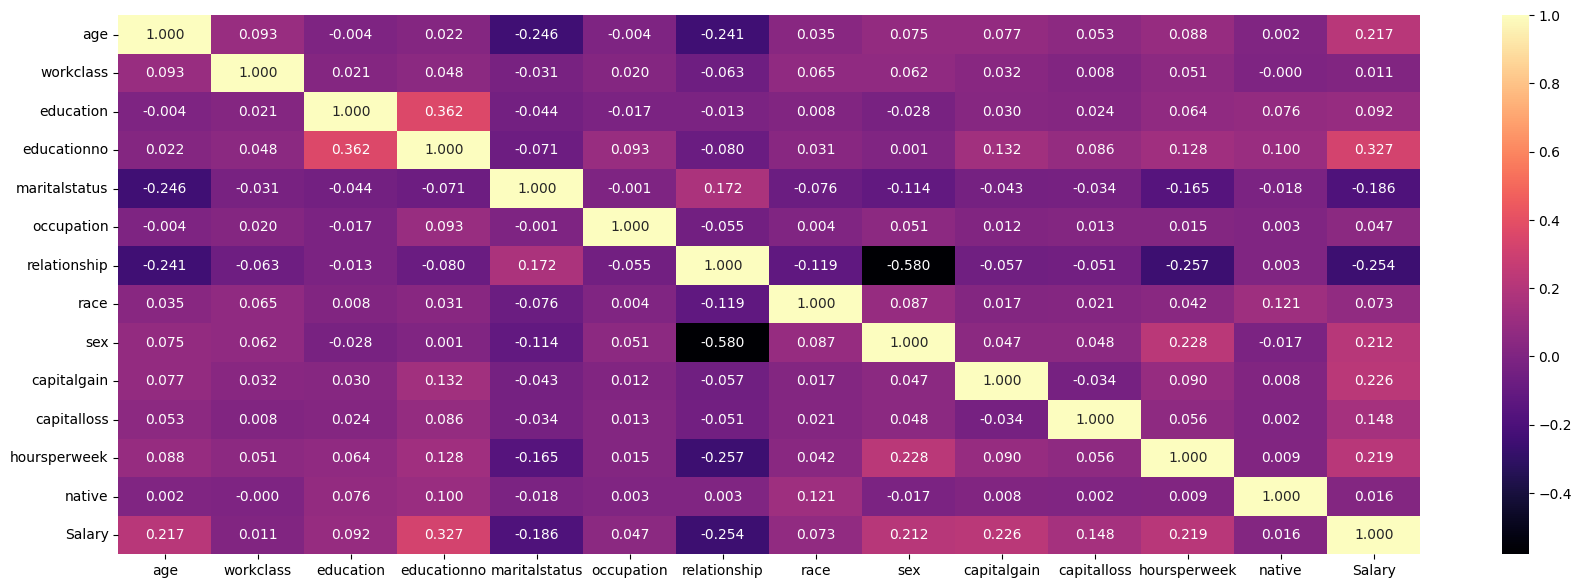

In [65]:
plt.figure(figsize = (21, 7));
sns.heatmap(salary_test.corr(), cmap='magma', annot=True, fmt=".3f")
plt.show()

Applying Train and Test split on Salary Dataset

In [66]:
x_train = salary.iloc[:,0:13]
y_train = salary.iloc[:,-1]

In [67]:
x_test = salary_test.iloc[:,0:13]
y_test = salary_test.iloc[:,-1]

In [68]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((26903, 13), (26903,), (14130, 13), (14130,))

Naive Bayes Classification

1. MultinomialNB

In [69]:
from sklearn.naive_bayes import MultinomialNB as MB

In [70]:
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)

MultinomialNB()

In [71]:
train_pred_m = classifier_mb.predict(x_train)
accuracy_train_m = np.mean(train_pred_m==y_train)

In [72]:
test_pred_m = classifier_mb.predict(x_train)
accuracy_test_m = np.mean(test_pred_m==y_train)

In [73]:
accuracy_train_m

0.7683158012117608

In [74]:
accuracy_test_m

0.7683158012117608

2. CategoricalNB

In [75]:
from sklearn.naive_bayes import CategoricalNB as CNB

In [76]:
classifier_cnb = CNB()
classifier_cnb.fit(x_train,y_train)

CategoricalNB()

In [77]:
train_pred_cnb = classifier_cnb.predict(x_train)
accuracy_train_cnb = np.mean(train_pred_cnb==y_train)

In [78]:
test_pred_cnb = classifier_cnb.predict(x_train)
accuracy_test_cnb = np.mean(test_pred_cnb==y_train)

In [79]:
accuracy_train_cnb

0.8539196372151805

In [80]:
accuracy_test_cnb

0.8539196372151805

3. GaussianNB

In [81]:
from sklearn.naive_bayes import GaussianNB as GB

In [82]:
classifier_gb = GB()
classifier_gb.fit(x_train,y_train)

GaussianNB()

In [83]:
train_pred_g = classifier_gb.predict(x_train)
accuracy_train_g = np.mean(train_pred_g==y_train)

In [84]:
test_pred_g = classifier_gb.predict(x_train)
accuracy_test_g = np.mean(test_pred_g==y_train)

In [85]:
accuracy_train_g

0.7933687692822362

In [86]:
accuracy_test_g

0.7933687692822362